<a href="https://colab.research.google.com/github/erenofc28/Loan-Status-Prediction/blob/main/Loan_Status_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
df = pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


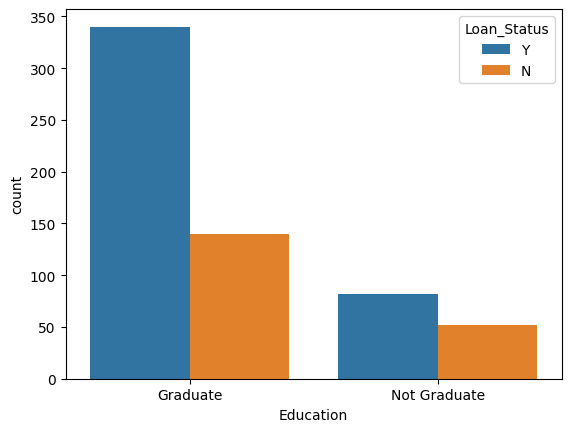

In [ ]:
sns.countplot(x = df["Education"] , hue = df["Loan_Status"] )
plt.show()

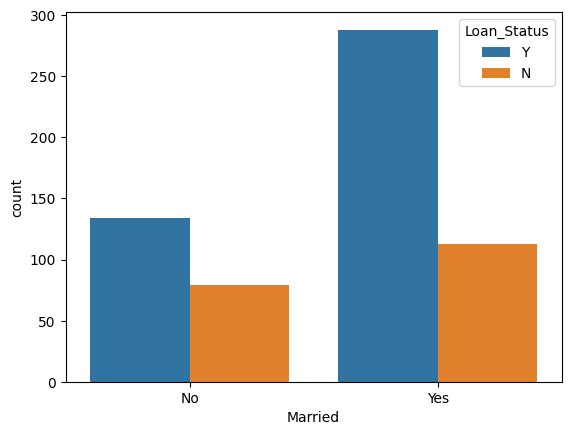

In [ ]:
sns.countplot(x = df["Married"] , hue = df["Loan_Status"] )
plt.show()

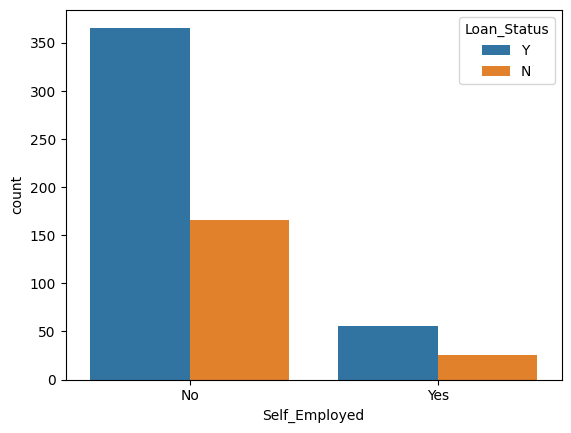

In [ ]:
sns.countplot(x = df["Self_Employed"] , hue = df["Loan_Status"] )
plt.show()

In [ ]:
df.shape

(614, 13)

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
cat_miss_cols = ["Gender","Married","Dependents","Self_Employed","Loan_Amount_Term","Credit_History"]
for col in cat_miss_cols:
  df[col].fillna(df[col].mode()[0],inplace=True)

/tmp/ipython-input-227-3319632012.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,0


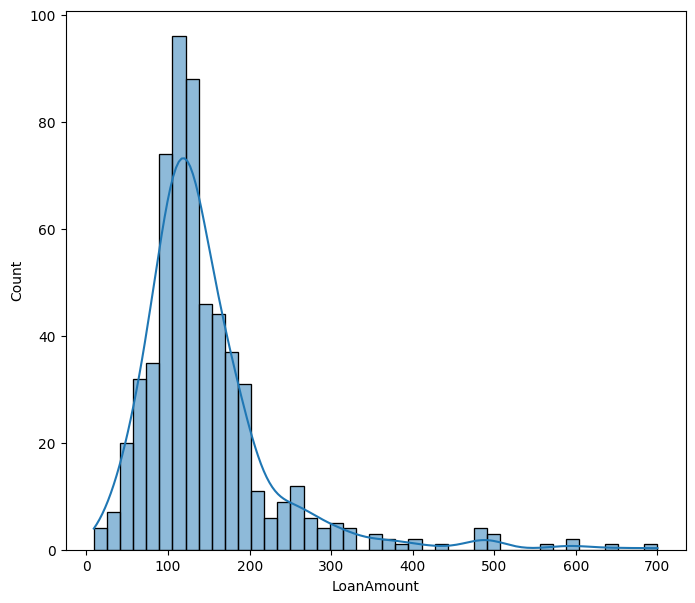

In [ ]:
plt.figure(figsize=(8,7))
sns.histplot(x= df["LoanAmount"],kde=True)
plt.show()

In [ ]:
df['LoanAmount'].fillna(df["LoanAmount"].median(),inplace=True)

/tmp/ipython-input-230-798616312.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df["LoanAmount"].median(),inplace=True)


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:

X = df.drop(columns = ["Loan_ID","Loan_Status"])
y= df["Loan_Status"]



In [ ]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [ ]:
y.head()

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y


In [ ]:
le = sklearn.preprocessing.LabelEncoder()

In [ ]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [ ]:
cat_cols = ["Gender","Married","Education","Self_Employed","Property_Area"]
for col in cat_cols:
  X.loc[:,col] = sklearn.preprocessing.LabelEncoder().fit_transform(X[col])

In [ ]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [ ]:
y.head()

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y


In [ ]:
y.info

<bound method Series.info of 0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object>

In [ ]:
y= le.fit_transform(y)
y = pd.DataFrame(y)

In [ ]:
y.head()
#  YES => 1
#  NO => 0

,0
0,1
1,0
2,1
3,1
4,1


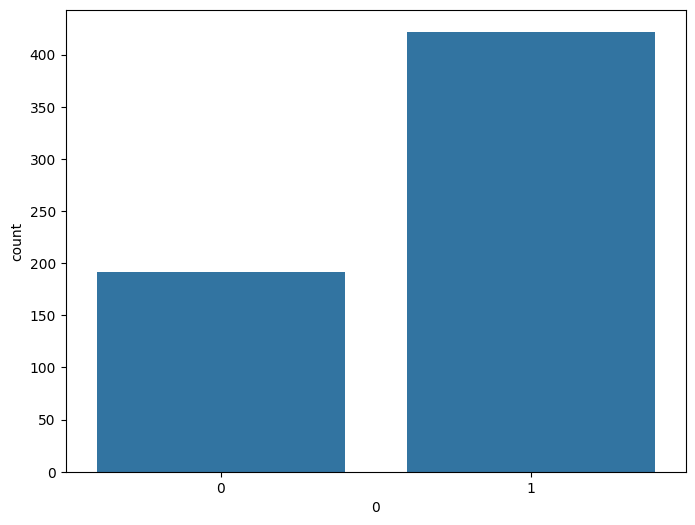

In [ ]:
plt.figure(figsize = (8, 6))
sns.countplot(x = y[0])
plt.show()

In [ ]:
X.dtypes

,0
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [ ]:
for col in X.columns:
  print(col," : ",X[col].unique())

Gender  :  [1 0]
Married  :  [0 1]
Dependents  :  ['0' '1' '2' '3+']
Education  :  [0 1]
Self_Employed  :  [0 1]
ApplicantIncome  :  [ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 10513  6080 20166  2014  2718  3459  4895
  3316 14999  4200  5042  6950  2698 11757  2330 14866  1538 10000  4860
  6277  2577  9166  2281  3254 39999  9538  2980  1863  7933  30

In [ ]:
X["Dependents"] = X["Dependents"].replace({"3+":3})

In [ ]:
for col in X.columns:
  X[col] = X[col].astype(int)

In [ ]:
X.dtypes

,0
Gender,int64
Married,int64
Dependents,int64
Education,int64
Self_Employed,int64
ApplicantIncome,int64
CoapplicantIncome,int64
LoanAmount,int64
Loan_Amount_Term,int64
Credit_History,int64


In [ ]:
smote = SMOTE()
X , y = smote.fit_resample(X,y)

In [ ]:
y.dtypes

,0
0,int64


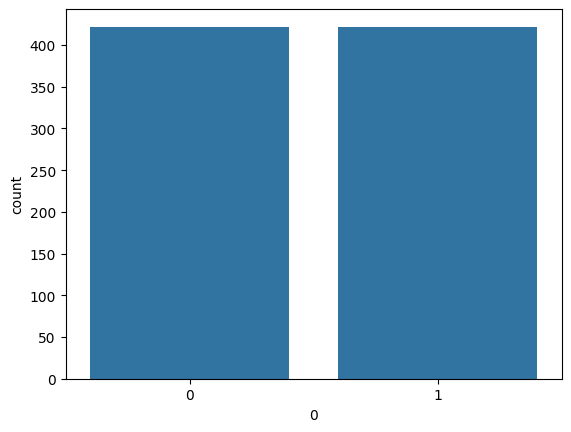

In [ ]:
sns.countplot(x = y[0])
plt.show()

In [ ]:
y.shape

(844, 1)

In [ ]:
X.shape

(844, 11)

In [ ]:
x_train , x_test , y_train , y_test = sklearn.model_selection.train_test_split(X,y,stratify=y,train_size = 0.8,random_state = 3)

In [ ]:
models = {
    "Logistic" : sklearn.linear_model.LogisticRegression(),
    "randomForest" : sklearn.ensemble.RandomForestClassifier(),
    "decisionTree" : sklearn.tree.DecisionTreeClassifier(),
    "svm": sklearn.svm.SVC()
}

In [ ]:
scores = {}
for model_name , model in models.items():
  score = sklearn.model_selection.cross_val_score(model ,x_train , y_train , cv = 5 ,scoring = "accuracy" )
  scores[model_name] = [float(score.mean()) , float(np.std(score))]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

In [ ]:
for model,score in scores.items():
  print(model," : ",f"score : {score[0]} ",f"std dev : {score[1]}")

Logistic  :  score : 0.7674074074074075  std dev : 0.029851024710533167
randomForest  :  score : 0.7955555555555557  std dev : 0.038802372899877924
decisionTree  :  score : 0.7348148148148148  std dev : 0.022172784514215935
svm  :  score : 0.5081481481481481  std dev : 0.03332510186430221


In [ ]:
model = models["randomForest"]
params = {
    "n_estimators":[100,150,200],
    "max_depth":[3,4,5],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,3,4,5],
    "criterion":["gini","entropy"]

}

In [ ]:
randomsearch = RandomizedSearchCV(model , params , cv = 5 , n_iter = 20 , scoring = "accuracy")
randomsearch.fit(x_train , y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 150, 200]},
                   scoring='accuracy')

In [ ]:
print("best scores : ",randomsearch.best_score_)
print("best params : ",randomsearch.best_params_)

best scores :  0.7925925925925925
best params :  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_depth': 5, 'criterion': 'entropy'}


In [ ]:
# best params :  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_depth': 5, 'criterion': 'entropy'}
model = sklearn.ensemble.RandomForestClassifier(**randomsearch.best_params_)

In [ ]:
model.fit(x_train , y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=5)

In [ ]:
acc_score = sklearn.metrics.accuracy_score
classif_rep = sklearn.metrics.classification_report

In [ ]:
pred = model.predict(x_train)
print("training score : ",acc_score(y_train,pred))
print(classif_rep(y_train , pred))

training score :  0.8222222222222222
              precision    recall  f1-score   support

           0       0.97      0.67      0.79       337
           1       0.75      0.98      0.85       338

    accuracy                           0.82       675
   macro avg       0.86      0.82      0.82       675
weighted avg       0.86      0.82      0.82       675



In [ ]:
pred = model.predict(x_test)
print("test score : ",acc_score(y_test,pred))
print(classif_rep(y_test , pred))

test score :  0.8402366863905325
              precision    recall  f1-score   support

           0       0.97      0.71      0.82        85
           1       0.77      0.98      0.86        84

    accuracy                           0.84       169
   macro avg       0.87      0.84      0.84       169
weighted avg       0.87      0.84      0.84       169



In [ ]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0,128,360,1,2
1,1,1,1,0,0,4583,1508,128,360,1,0
2,1,1,0,0,1,3000,0,66,360,1,2
3,1,1,0,1,0,2583,2358,120,360,1,2
4,1,0,0,0,0,6000,0,141,360,1,2
